# ISOT LR on LIAR

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.4.2. This might lead to b

              precision    recall  f1-score   support

           0       0.44      0.98      0.60       553
           1       0.58      0.02      0.04       714

    accuracy                           0.44      1267
   macro avg       0.51      0.50      0.32      1267
weighted avg       0.52      0.44      0.29      1267



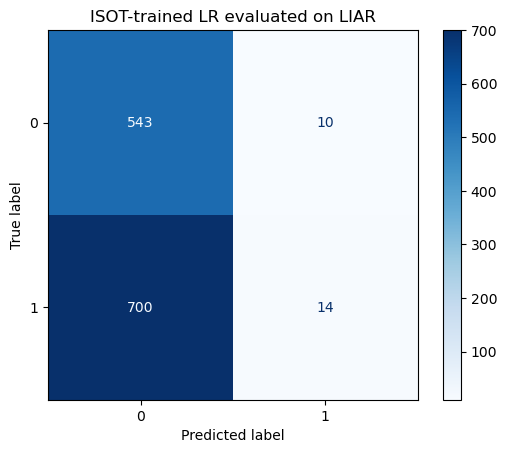

In [26]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

pipe = joblib.load(r"C:\Users\ksb20168\OneDrive - University of Strathclyde\Fifth Year\MS983\Models\ISOT_LR_model.joblib")
tfidf = joblib.load(r"C:\Users\ksb20168\OneDrive - University of Strathclyde\Fifth Year\MS983\Models\ISOT_tfidf.joblib")
model = pipe.named_steps["clf"]   # trained on ISOT

# Load the LIAR dataset
liardf = pd.read_csv(r'C:\Users\ksb20168\OneDrive - University of Strathclyde\Fifth Year\MS983\Datasets\LIAR\FullyCleanedLIAR.csv')

# Masks as NumPy arrays
mask_train = liardf['dataset'].isin([0, 1]).to_numpy()
mask_test  = (liardf['dataset'].to_numpy() == 2)

# Statements
X_train = liardf.loc[mask_train, 'statement'].fillna('')
X_test = liardf.loc[mask_test, 'statement'].fillna('')

# Labels
y_train = liardf.loc[mask_train, 'label_binary'].to_numpy()
y_test  = liardf.loc[mask_test,  'label_binary'].to_numpy()

# Transform LIAR test data with the ISOT tfidf
X_liar_tfidf = tfidf.transform(X_test)

y_pred = model.predict(X_liar_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("ISOT-trained LR evaluated on LIAR")
plt.show()